In [31]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from matplotlib import colors

In [20]:
states = gpd.read_file('rev-india/genx/tiff/IND_adm1.shp')
regions = gpd.read_file('rev-india/genx/tiff/IND_adm0.shp')
files = 'forecast-india/results/rapid/home/baseline/summary'

In [21]:
filelist = os.listdir(files)
states = states.set_index('NAME_1')
regions = regions.set_index('NAME_0')
for val in filelist:
    df = pd.read_csv(files+'/'+val,index_col=0)
    foo = df.loc[2050].sum()/1000000
    try:
        states.loc[val[:-4],'Demand_TWh'] = int(foo)
    except:
        pass
    try:
        regions.loc[val[:-4],'Demand_TWh'] = int(foo)
    except:
        pass

In [22]:
states = states.drop(['ER','WR','NER','NR','SR','India'])
regions = regions.drop(states.index.tolist()+['India'])

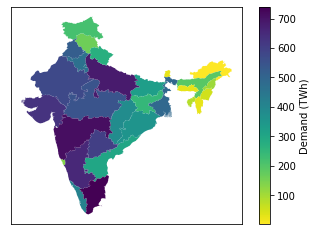

In [40]:
# create the colorbar
norm = colors.Normalize(vmin=states.Demand_TWh.min(), vmax=states.Demand_TWh.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')

# plot
fig, ax = plt.subplots(1,1)
states.plot(column='Demand_TWh', cmap='viridis_r', legend=False, ax=ax) 
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label(label='Demand (TWh)', size='x-large')
ax_cbar.ax.tick_params(size='x-large')
plt.show()

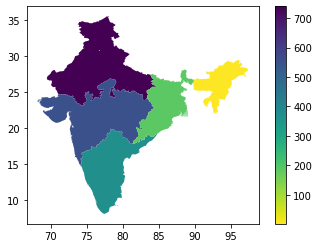

In [36]:
# create the colorbar
norm = colors.Normalize(vmin=states.Demand_TWh.min(), vmax=states.Demand_TWh.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')

# plot
fig, ax = plt.subplots(1,1)
regions.plot(column='Demand_TWh', cmap='viridis_r', legend=False, ax=ax) 
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax,label='Demand (TWh)')
plt.show()